### Time series Analysis

here I use TSLA dataset in order to analysis their share.
1. library pandas_datareader to read from TSLA
2. methods: resample, rolling

the main objective is to understand TSLA's share data by performing:
1. ploting line chart
2. resampling
3. calculating moving average like simple, cummulative, and exponential
4. spliting the data in to time series components

importing necessary libraries

In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loading TSLA data

In [2]:
tesla=pdr.get_data_yahoo('TSLA')
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-30,67.255997,65.152000,65.199997,67.019997,38914500.0,67.019997
2017-05-31,68.578003,67.031998,67.538002,68.202003,49817000.0,68.202003
2017-06-01,68.975998,67.458000,68.800003,68.073997,38040000.0,68.073997
2017-06-02,68.575996,67.185997,67.954002,67.970001,27951000.0,67.970001
2017-06-05,69.688004,66.842003,67.699997,69.463997,33922000.0,69.463997


In [3]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-20,721.580017,633.000000,713.989990,663.900024,48190600.0,663.900024
2022-05-23,679.960022,638.059998,655.020020,674.900024,29634500.0,674.900024
2022-05-24,653.919983,620.570007,653.530029,628.159973,29697500.0,628.159973
2022-05-25,669.320007,623.010010,623.849976,658.799988,30713100.0,658.799988
2022-05-26,718.669922,653.669983,661.419983,707.729980,34426000.0,707.729980


In [4]:
tesla.shape

(1259, 6)

<AxesSubplot:xlabel='Date'>

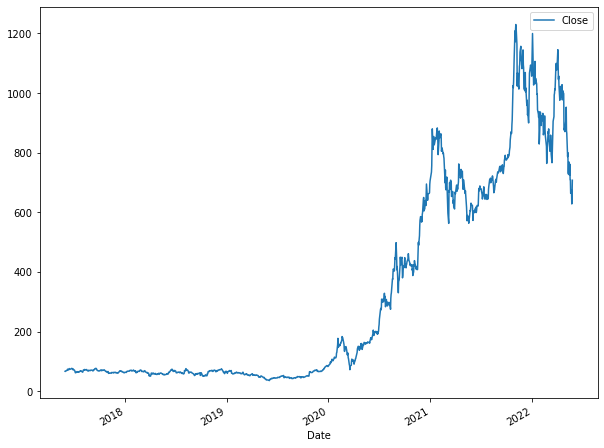

In [5]:
# plotting close value
tesla[['Close']].plot(figsize=(10,8))

<AxesSubplot:xlabel='Date'>

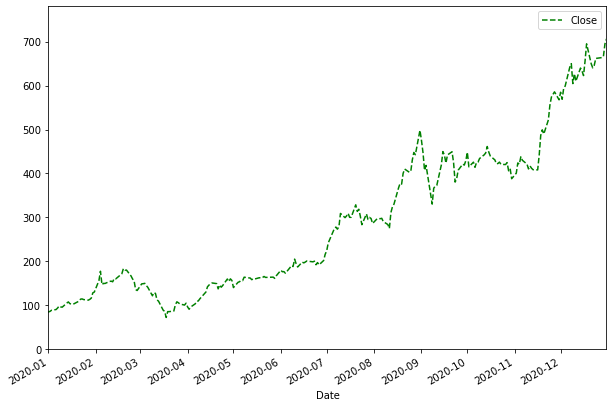

In [6]:
# ploting close value for 2020 year  
tesla[['Close']].plot(xlim=['2020-01-01','2020-12-31'],figsize=(10,7),ylim=[0,780],c='green',ls='--')

In [7]:
tesla.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
tesla.index

DatetimeIndex(['2017-05-30', '2017-05-31', '2017-06-01', '2017-06-02',
               '2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08',
               '2017-06-09', '2017-06-12',
               ...
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [9]:
tesla['Open']

Date
2017-05-30     65.199997
2017-05-31     67.538002
2017-06-01     68.800003
2017-06-02     67.954002
2017-06-05     67.699997
                 ...    
2022-05-20    713.989990
2022-05-23    655.020020
2022-05-24    653.530029
2022-05-25    623.849976
2022-05-26    661.419983
Name: Open, Length: 1259, dtype: float64

In [10]:
# overall mean of close
tesla['Close'].mean()

319.5399484278381

In [11]:
#to find mean of from 2021-01-01 to 2021-01-01
tesla['2021-01-01':'2021-01-31'].mean()

High         8.451600e+02
Low          8.110732e+02
Open         8.271774e+02
Close        8.287768e+02
Volume       3.714183e+07
Adj Close    8.287768e+02
dtype: float64

In [12]:
# look mean of all values for feabruary 2021
tesla['2021-02'].mean()

C:\Users\KIIT\AppData\Local\Temp/ipykernel_72176/888709161.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tesla['2021-02'].mean()


High         8.123574e+02
Low          7.741232e+02
Open         7.975726e+02
Close        7.942695e+02
Volume       2.751884e+07
Adj Close    7.942695e+02
dtype: float64

In [13]:
#mean of high,low,open,close,volume,adj close for 2021
tesla['2021'].mean()

C:\Users\KIIT\AppData\Local\Temp/ipykernel_72176/2271133439.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tesla['2021'].mean()


High         7.957318e+02
Low          7.627081e+02
Open         7.798393e+02
Close        7.799945e+02
Volume       2.739163e+07
Adj Close    7.799945e+02
dtype: float64

In [14]:
#https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78 
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling 
# links to understand resample

# looking mean of all values for each month in 2020
tesla['2020-01-01':'2020-12-31'].resample('M').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,107.285715,102.938000,104.609048,105.731809,9.695679e+07,105.731809
2020-02-29,166.152104,153.288210,158.950842,159.489368,1.243649e+08,159.489368
2020-03-31,117.411547,106.974091,112.785091,111.820273,9.566705e+07,111.820273
2020-04-30,137.320382,128.212762,133.058952,132.719715,9.082798e+07,132.719715
2020-05-31,163.147200,156.069100,159.812000,159.885102,6.817590e+07,159.885102
2020-06-30,196.173181,187.734000,191.638728,192.708453,5.813016e+07,192.708453
2020-07-31,303.024820,281.311821,292.988002,292.028179,8.605307e+07,292.028179
2020-08-31,367.357906,346.349333,354.512284,360.059711,7.416088e+07,360.059711
2020-09-30,428.257618,395.665713,414.282859,413.495239,8.268023e+07,413.495239


<AxesSubplot:xlabel='Date'>

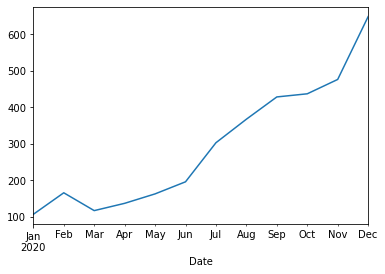

In [15]:
# let's plot the above point
tesla['2020-01-01':'2020-12-31']['High'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

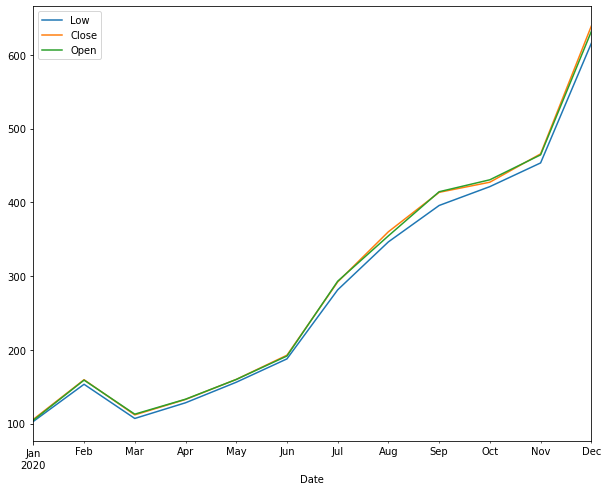

In [16]:
# let's plot the above point
tesla['2020-01-01':'2020-12-31'][['Low','Close','Open']].resample('M').mean().plot(figsize=(10,8))

In [17]:
# looking min value for each month in 2021 year
tesla['2021-01-01':'2021-12-31'].resample('M').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-31,740.840027,717.190002,719.460022,729.770020,20066500.0,729.770020
2021-02-28,706.700012,619.000000,662.130005,675.500000,15157700.0,675.500000
2021-03-31,616.479980,539.489990,600.549988,563.000000,23732200.0,563.000000
2021-04-30,680.969971,659.419983,667.590027,661.750000,21437100.0,661.750000
2021-05-31,566.210022,546.979980,552.549988,563.460022,21901900.0,563.460022
2021-06-30,600.609985,571.219971,579.710022,572.840027,16205300.0,572.840027
2021-07-31,647.200012,620.460022,628.369995,643.380005,13953300.0,643.380005
2021-08-31,674.580017,648.840027,669.750000,665.710022,9800600.0,665.710022
2021-09-30,734.000000,708.849976,732.250000,730.169983,11947500.0,730.169983


In [18]:
# let's look the avearage value for each year
tesla.resample('Y').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,69.073253,67.096200,68.204613,68.108053,3.385086e+07,68.108053
2018-12-31,64.738725,62.110462,63.436693,63.461984,4.306053e+07,63.461984
2019-12-31,55.529960,53.722508,54.605627,54.706040,4.579461e+07,54.706040
2020-12-31,297.288411,280.697937,289.108428,289.997067,7.530795e+07,289.997067
2021-12-31,795.731823,762.708136,779.839286,779.994482,2.739163e+07,779.994482
2022-12-31,944.135243,890.122180,919.959702,915.265739,2.742823e+07,915.265739


<AxesSubplot:xlabel='Date'>

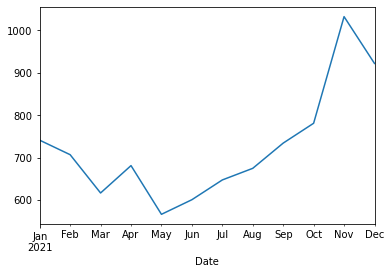

In [19]:
# let us plot the above
tesla['2021-01-01':'2021-12-31']['High'].resample('M').min().plot()

<AxesSubplot:xlabel='Date'>

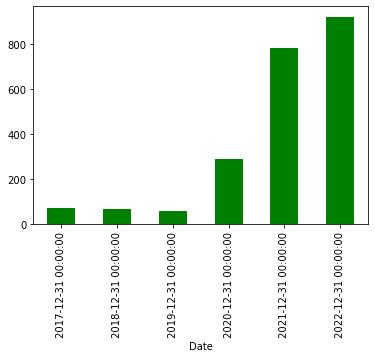

In [20]:
# let's plot the avearage value of open for each year
tesla['Open'].resample('Y').mean().plot(kind='bar',color='green')

In [21]:
# looking average of close for each quarter from 2020
close_quarter=tesla['2020-01-01':]['Close'].resample('Q').mean()
close_quarter

Date
2020-03-31     124.366322
2020-06-30     162.292096
2020-09-30     354.207405
2020-12-31     511.951094
2021-03-31     753.185899
2021-06-30     651.258255
2021-09-30     706.096559
2021-12-31    1006.169060
2022-03-31     934.401769
2022-06-30     884.844359
Freq: Q-DEC, Name: Close, dtype: float64

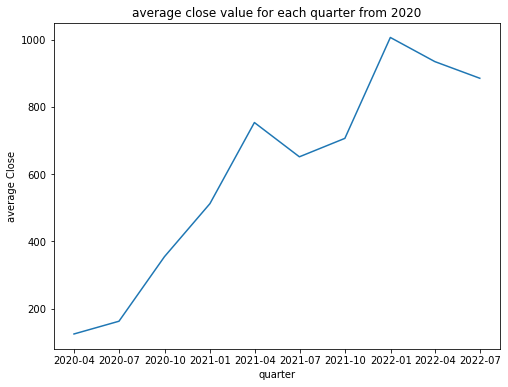

In [22]:
# let us plot the above data
plt.figure(figsize=(8,6))
plt.plot(close_quarter)
plt.xlabel('quarter')
plt.ylabel('average Close')
plt.title('average close value for each quarter from 2020')
plt.show()

In [23]:
import statsmodels.api as sm
from pylab import rcParams

C:\Users\KIIT\AppData\Local\Temp/ipykernel_72176/2907781574.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(tesla['Open'], model='additive',freq=12, extrapolate_trend = 12)


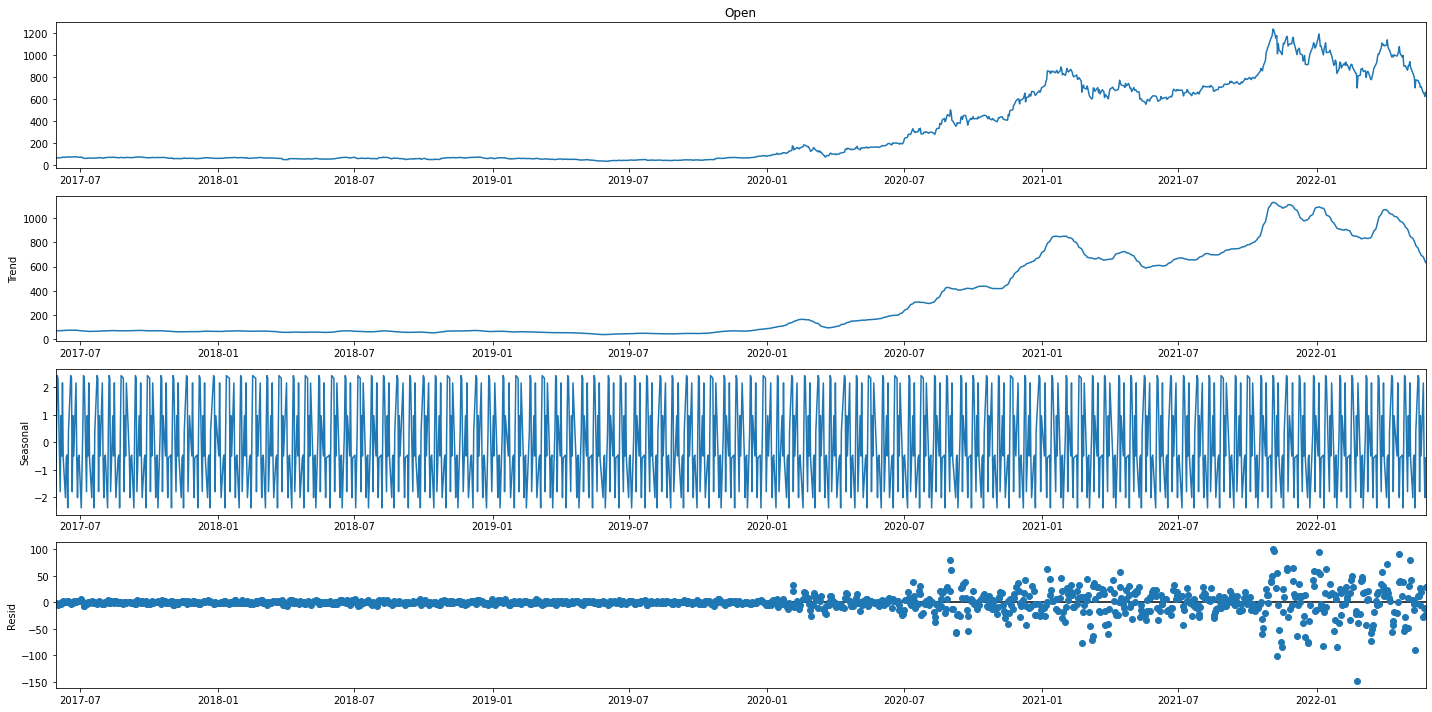

In [24]:
# decomposing the data in to its components: trend, seasonal, residual/noise
# refer https://analyticsindiamag.com/why-decompose-a-time-series-and-how/#:~:text=Components%20of%20time%20series%20are,%2C%20season%20and%20residual%2Fnoise. to understand components of time sereis components
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(tesla['Open'], model='additive',freq=12, extrapolate_trend = 12)
fig = decomposition.plot()
plt.show()

In [25]:
# rolling to calculate simple moving average
# refer https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases to understand more about rolling
tesla['2020-01-01':'2020-12-31'].rolling(window=5).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,92.255199,88.808801,89.622800,91.440399,86470000.0,91.440399
2020-01-09,94.979199,90.855200,92.526799,93.483598,105378300.0,93.483598
2020-01-10,96.216798,92.326399,94.178400,94.889198,100559300.0,94.889198
2020-01-13,99.179599,94.406400,96.299599,97.821999,116943900.0,97.821999
2020-01-14,102.210800,97.268001,99.613998,100.576399,128058000.0,100.576399


In [26]:
'''
Formula for comulative moving average:

CMAt = (1/kt) * ∑ (i=0 to k)  ai

where:

CMAt = Cumulative Moving Average at time t
kt = number of observations upto time t
ai = ith element of the set of observations
'''

'\nFormula for comulative moving average:\n\nCMAt = (1/kt) * ∑ (i=0 to k)  ai\n\nwhere:\n\nCMAt = Cumulative Moving Average at time t\nkt = number of observations upto time t\nai = ith element of the set of observations\n'

In [27]:
# comulative moving average
windows = tesla['2020-01-01':'2020-12-31'].expanding(min_periods=1)
moving_averages = windows.mean()
moving_averages.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,88.470001,85.863003,86.500000,87.327000,68276500.0,87.327000
2020-01-06,89.084000,86.575335,87.031334,88.320666,62406000.0,88.320666
2020-01-07,90.394499,87.599501,88.343500,89.693499,69157125.0,89.693499
2020-01-08,92.255199,88.808801,89.622800,91.440399,86470000.0,91.440399


In [28]:
tesla['2020-01-01':'2020-12-31'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [29]:
# Exponential moving average
# Get the moving averages of series
# of observations till the current time
moving_averages = round(tesla.ewm(
  alpha=0.5, adjust=False).mean(), 2)
  
# Convert pandas series back to list
moving_averages['2020-01-01':'2020-12-31'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,85.63,83.04,84.10,84.99,5.105856e+07,84.99
2020-01-03,88.22,85.21,86.10,86.80,6.997553e+07,86.80
2020-01-06,89.26,86.61,87.10,88.55,6.032026e+07,88.55
2020-01-07,91.79,88.64,89.69,91.18,7.486538e+07,91.18
2020-01-08,95.75,91.14,92.21,94.81,1.152934e+08,94.81
